In [ ]:
from random import randint
import random
from pathlib import Path
from PIL import Image, ImageDraw
import pandas as pd
from collections import namedtuple
from fastai.vision.utils import get_image_files
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
b_imgs = get_image_files(Path('../img/boards'))
p_imgs = get_image_files(Path('../img/pieces'))

In [ ]:
boards

(#28) [Path('../img/boards/8.png'),Path('../img/boards/9.png'),Path('../img/boards/14.png'),Path('../img/boards/28.png'),Path('../img/boards/15.png'),Path('../img/boards/17.png'),Path('../img/boards/16.png'),Path('../img/boards/12.png'),Path('../img/boards/13.png'),Path('../img/boards/11.png')...]

In [ ]:
piece_sets

(#384) [Path('../img/pieces/32/b_w.png'),Path('../img/pieces/32/b_b.png'),Path('../img/pieces/32/q_w.png'),Path('../img/pieces/32/q_b.png'),Path('../img/pieces/32/n_b.png'),Path('../img/pieces/32/n_w.png'),Path('../img/pieces/32/p_b.png'),Path('../img/pieces/32/k_b.png'),Path('../img/pieces/32/r_w.png'),Path('../img/pieces/32/r_b.png')...]

In [ ]:
class Board:
    """ 
        Represents a rendered board with particular dark and light colors.
        There are no pieces on the board.
    """
    def __init__(self, img):
        self.img = img

In [ ]:
class PieceSet:
    """ 
        Represents the 12 individual pieces comprising a chess set. 
        This includes a rook, knight, bishop, queen, king, and pawn for both black and white pieces.
    """
    def __init__(self, dir):
        self.dir = dir

In [ ]:
class GameBoard:
    """
        Represents a combination of a Board, PieceSet, and optionally a FEN.
    """
    def __init__(self, board, piece_set):
        self.board = board
        self.piece_set = piece_set

In [ ]:
b = Board(Image.open(boards[10]))

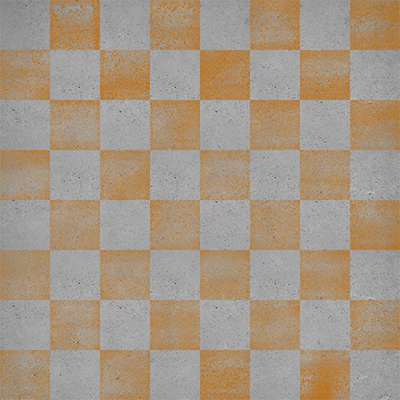

In [ ]:
b.img

# Old Stuff

In [ ]:
wbs =  get_image_files(Path("/Users/id/.fastai/data/websites/"))
bss = get_image_files(Path("/Users/id/.fastai/data/kaggle-chess/"))

def path(x): return '/'.join(x.parts[-2:])

df0 = pd.Series(bss, name="board")
df0 = df0.apply(path)

df1 = pd.Series(wbs, name="website")
df1 = df1.repeat(len(df0)//len(df1)+1)[:len(df0)]
df1 = df1.reset_index(drop=True)

np.random.seed(123)
df1=df1.sample(frac=1).reset_index(drop=True)
df1 = df1.apply(path)
df = pd.concat([df0, df1], axis=1, ignore_index=False)

def make_sample():
    w_width = 1024
    w_height = 768
    b_width=400
    b_height=400
    x = randint(50, w_width - b_width - 50)
    y = randint(50, w_height - b_height - 50)
    dx = randint(20, 100)
    dy = randint(20, 100)
    return (x, y, dx, dy)

In [ ]:
import pandas as pd
from pathlib import Path
from PIL import Image, ImageDraw
from random import randint

In [ ]:
df = pd.read_csv("annotations.csv")
web_url = Path("/Users/id/.fastai/data/websites/")
board_url = Path("/Users/id/.fastai/data/kaggle-chess/")
gen_url = Path("/Users/id/.fastai/data/chess_screenshots2/")

def make_image(board, website, x, y, dx, dy):
    b = Image.open(board_url/board)
    s = Image.open(web_url/website)
    s.paste(b, (x, y))
    c = s.crop((x-dx, y-dy, x+400+dx, y+400+dy))
    return c

def save_image(img, i): img.save(gen_url / f'{i:06d}.png')
def PILrect(board, website, x, y, dx, dy): return ((dx, dy), (400+dx, 400+dy))

# [save_image(make_image(*_[1]), _[0]) for _ in df.iterrows()]

FileNotFoundError: [Errno 2] No such file or directory: 'annotations.csv'